# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

A US bike-sharing provider `BoomBikes` has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

they want to understand the factors affecting the demand for  shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands

  
**Business Goal:**
it is  required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. *

In [11]:
# import all necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## 1: Reading and Understanding the Data

Let us first read bike sharing data set

In [12]:
bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
print(bike_sharing.shape)
print(bike_sharing.isnull().sum())

(730, 16)
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [14]:
print(bike_sharing.info())
print(bike_sharing.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None
0


In [15]:
bike_sharing.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

**So it is clear that we dont have null and duplicate values**

In [16]:
# map weathersit,season,yr columns
bike_sharing['weathersit'] = bike_sharing['weathersit'].map({1:"Clear cloud",2:"Misty cloud",3:"Light Rain",4:"Heavy Rain"})
bike_sharing['season'] = bike_sharing['season'].map({1:"spring",2:"summer",3:"fall",4:"winter"})
bike_sharing['yr'] = bike_sharing['yr'].map({0:2018,1:2019})
print(bike_sharing.head())
print(bike_sharing.info())

   instant      dteday  season    yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018  spring  2018     1        0        6           0   
1        2  02-01-2018  spring  2018     1        0        0           0   
2        3  03-01-2018  spring  2018     1        0        1           1   
3        4  04-01-2018  spring  2018     1        0        2           1   
4        5  05-01-2018  spring  2018     1        0        3           1   

    weathersit       temp     atemp      hum  windspeed  casual  registered  \
0  Misty cloud  14.110847  18.18125  80.5833  10.749882     331         654   
1  Misty cloud  14.902598  17.68695  69.6087  16.652113     131         670   
2  Clear cloud   8.050924   9.47025  43.7273  16.636703     120        1229   
3  Clear cloud   8.200000  10.60610  59.0435  10.739832     108        1454   
4  Clear cloud   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class '

In [17]:
# map  month column
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Map the mnth column
bike_sharing['mnth'] = bike_sharing['mnth'].map(month_map)

In [18]:
# map weekday column
weekday_map = {0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thr",5:"Fri",6:"Sat"}
bike_sharing['weekday'] = bike_sharing['weekday'].map(weekday_map)

In [19]:
bike_sharing.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2018.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2018.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,2018.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,2019.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,2019.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000



#### Removing Redundent variable

 the following variables can be removed from further analysis:
 - **instant:** it only contain index value
 - **dteday:** As we have already `yr` and `mnth` column we can remove `dteday`.
 - **registered	and casual:** Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

In [20]:
bike_sharing_new = bike_sharing.drop(['instant','dteday','registered','casual'],axis=1)
bike_sharing_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Misty cloud,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,Misty cloud,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,Clear cloud,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tue,1,Clear cloud,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,1,Clear cloud,9.305237,11.46350,43.6957,12.522300,1600


#### Visualisation
Let us visualise the data , our target variable will be cnt

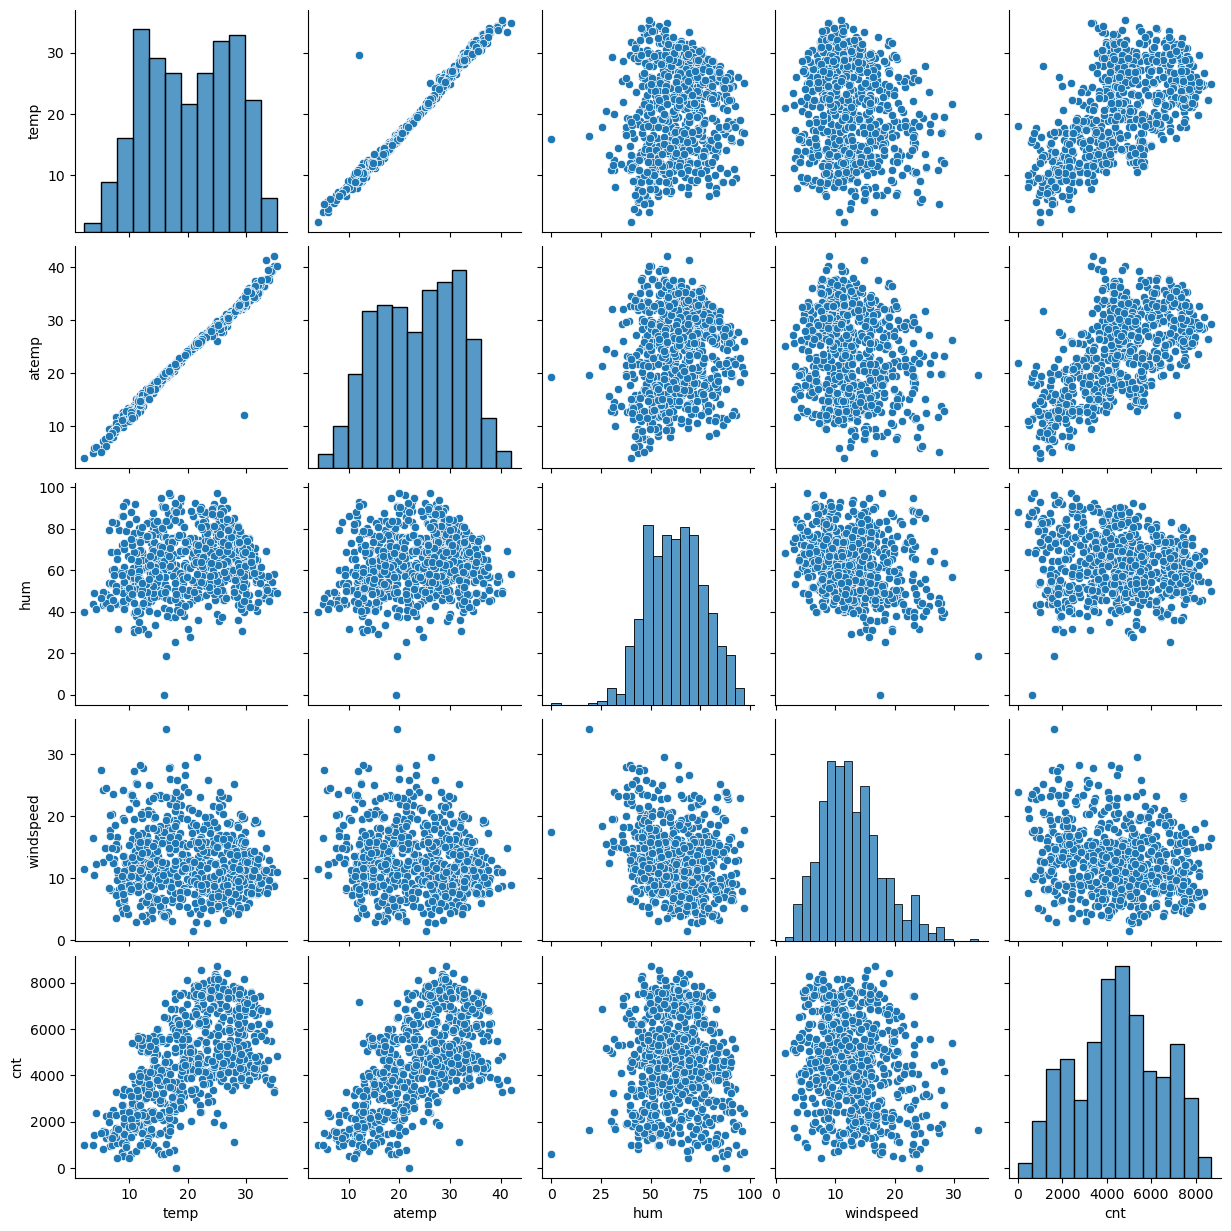

In [21]:
# numerical value visualisation
numerical_variable = ['temp','atemp','hum','windspeed','cnt']
sns.pairplot(bike_sharing_new[numerical_variable])
plt.show()

**Insights:**
- atemp and temp is an affecting feature on total rental bikes (this is behavirol if temp will increase people will prefer rental bikes instead of walking).
- we can remove one of them (will do it later)

In [22]:

def aggregateScatterPlot(X, aggregate_func, df=bike_sharing_new, y='cnt'):
    """
    Parameters:
    X: List of variable to visualize
    df: The dataframe containing the data
    y: The continuous target variable for the boxplot (default is 'cnt')
    aggregate_func: aggregate function name
    """
    valid_functions = ['mean', 'sum', 'median', 'min', 'max']
    assert aggregate_func in valid_functions, f"{aggregate_func} is not a valid function type"
    
    total_var = len(X)
    col = 3
    row = math.ceil(total_var / col)
    
    fig, ax = plt.subplots(row, col, figsize=(15, 15))
    all_axis = ax.flatten()
    
    
    for i in range(total_var):
        agg_func = getattr(pd.Series, aggregate_func)
        new_df = df.groupby(X[i])[y].agg(agg_func).reset_index()
        if X[i] == 'mnth':
            new_df['mnth'] = pd.Categorical(new_df['mnth'], categories=list(month_map.values()), ordered=True)
            new_df = new_df.sort_values(by='mnth')
        elif X[i] == 'weekday':
            new_df['weekday'] = pd.Categorical(new_df['weekday'], categories=list(weekday_map.values()), ordered=True)
            new_df = new_df.sort_values(by='weekday') 
        # Create scatter plot
        sns.scatterplot(x=X[i], y=y, data=new_df, ax=all_axis[i])
        all_axis[i].set_xlabel(X[i], fontsize=10)
        all_axis[i].set_ylabel(y, fontsize=10)
        all_axis[i].tick_params(axis='x', rotation=90)
        all_axis[i].set_title(f'{aggregate_func.capitalize()} of {y} by {X[i]}')
    
    # Delete any extra axes not needed
    for j in range(total_var, len(all_axis)):
        fig.delaxes(all_axis[j])
    
    plt.tight_layout()
    plt.show()




In [23]:
def categoricalBoxPlot(X, df=bike_sharing_new, y='cnt', hue=None):
    """
    This function creates boxplots for multiple categorical variables against a continuous target variable. 
    The plots help in visualizing the distribution of the target variable (y) across the different levels 
    of each categorical variable in the dataset.
    
    Parameters:
    X: List of categorical variables to plot
    df: The dataframe containing the data (default is 'bike_sharing_new')
    y: The continuous target variable for the boxplot (default is 'cnt')
    hue: (Optional) A variable in the data for coloring the plot based on categories
    
    The function arranges the plots in rows and columns for better visualization. 
    It hides any extra empty subplots if the total number of categorical variables is less 
    than the number of available subplot spaces.
    """
    # Get the total number of categorical variables to plot
    total_variable = len(X)
    # Calculate the number of rows needed for subplots (3 columns)
    row, column = math.ceil(total_variable / 3), 3
    # Create a figure and axes for the subplots with specified size
    fig, axis = plt.subplots(row, column, figsize=(15, row * 5))  # Adjust the figure size
    ax = axis.flatten()  # Flatten the axes array for easier indexing

    # Loop through each categorical variable in X
    for i, cat in enumerate(X):
        # Create a boxplot for the current categorical variable against the target variable y
        sns.boxplot(x=cat, y=y, ax=ax[i], hue=hue, data=df, palette=['Blue', 'Green', 'Red', 'Yellow'])
        ax[i].set_title(cat)  # Set the title for each subplot based on the categorical variable
        ax[i].set_xlabel(cat)  # Set x-axis label
        ax[i].set_ylabel(y)    # Set y-axis label
        ax[i].tick_params(axis='x', rotation=90)

    # Hide any empty subplots if the number of variables is less than the total subplot capacity
    for j in range(len(X), row * column):
        fig.delaxes(ax[j])

    plt.tight_layout()  # Adjust layout to prevent overlap of subplots
    plt.subplots_adjust(hspace=0.5, wspace=0.2)  # Adjust spacing between plots
    plt.show()  # Display the plots


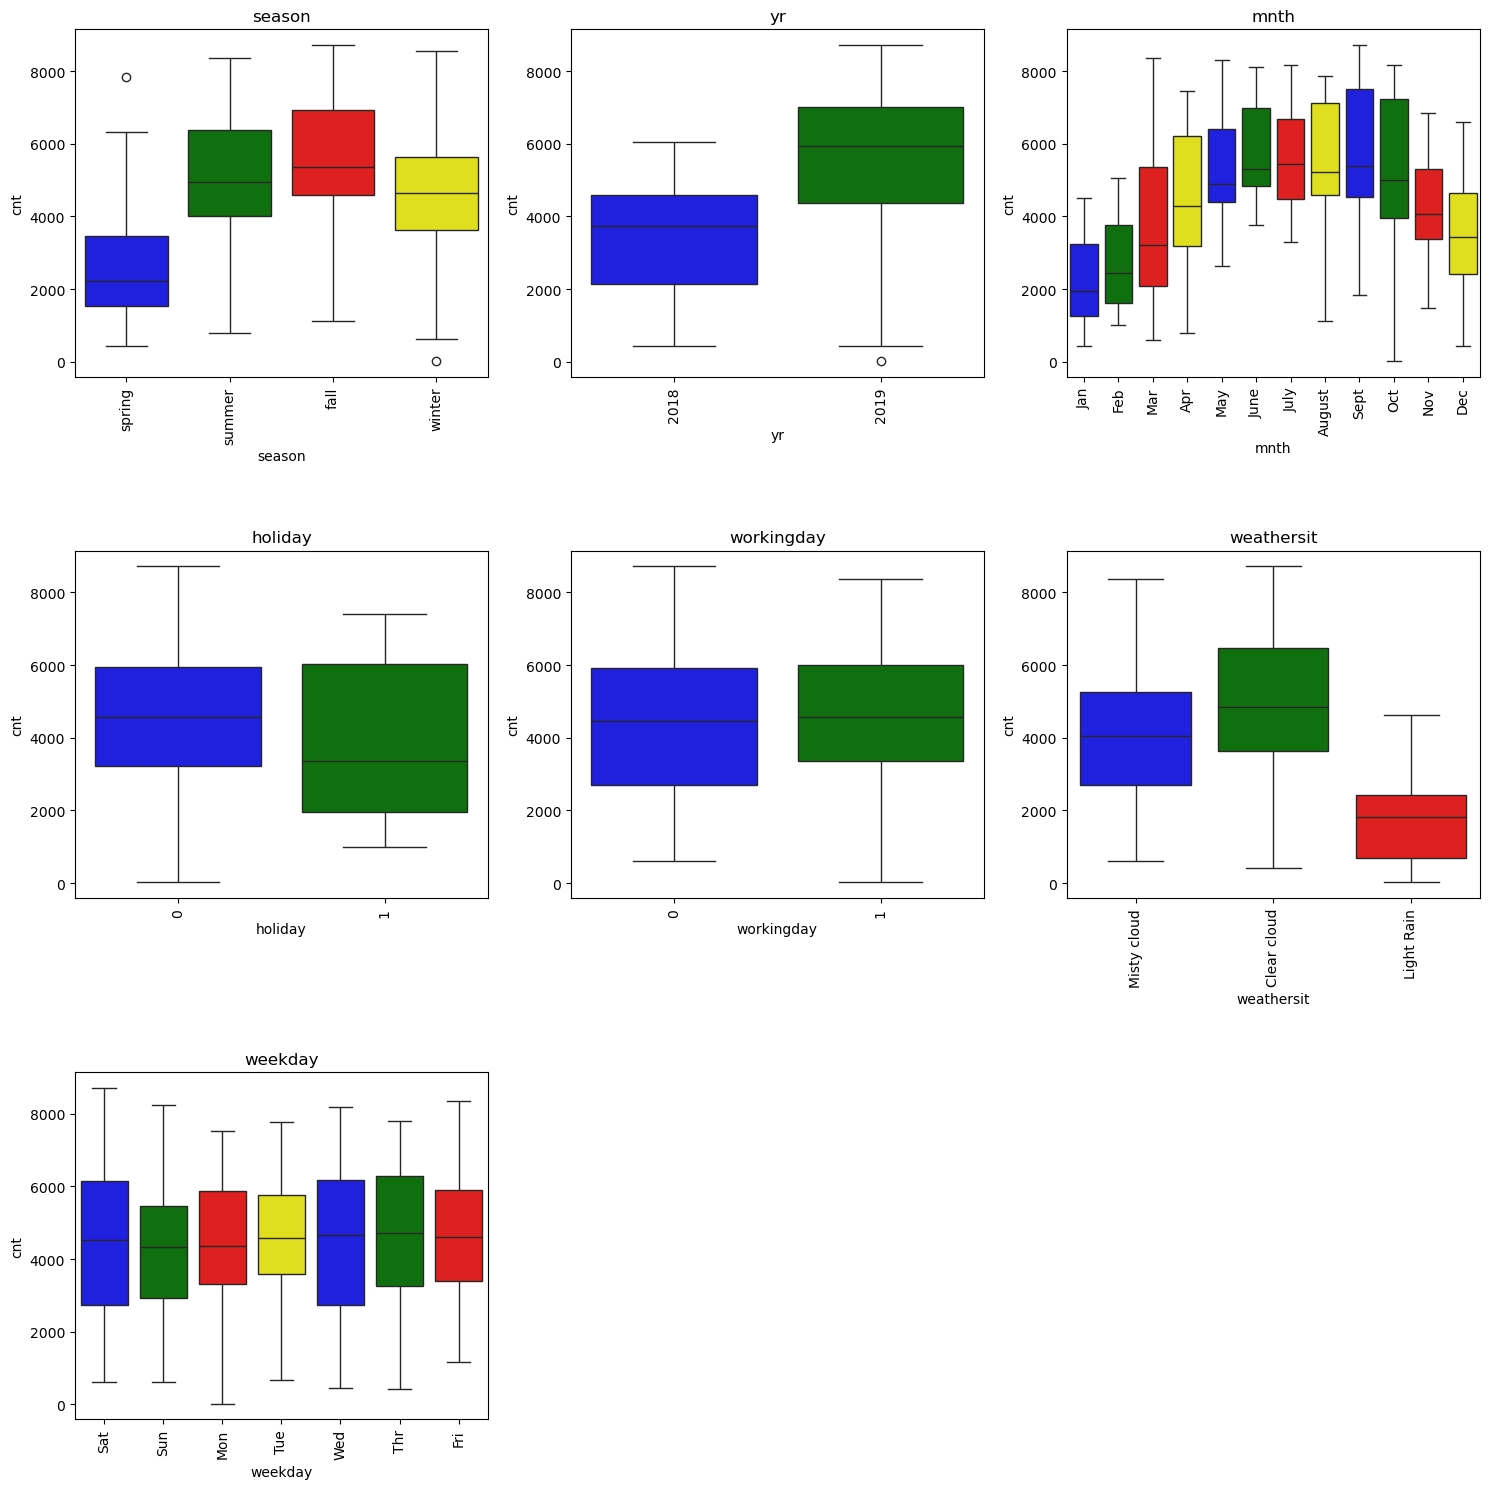

In [24]:
# categorical box plot for total rental bikes
categorical_variable = ['season','yr','mnth','holiday','workingday','weathersit','weekday']
categoricalBoxPlot(categorical_variable)

**Insights:**
- counts of total rental bikes increased in summer and fall and decreased in winter(we can see same pattern in month variable also)
- counts of total rental bikes increased in year 2019
- their is a less demand on holiday
- if weather is clear then their is high demand of rental bikes and if it is raining then it has less demand
- **We don't have outliers in the given data set**

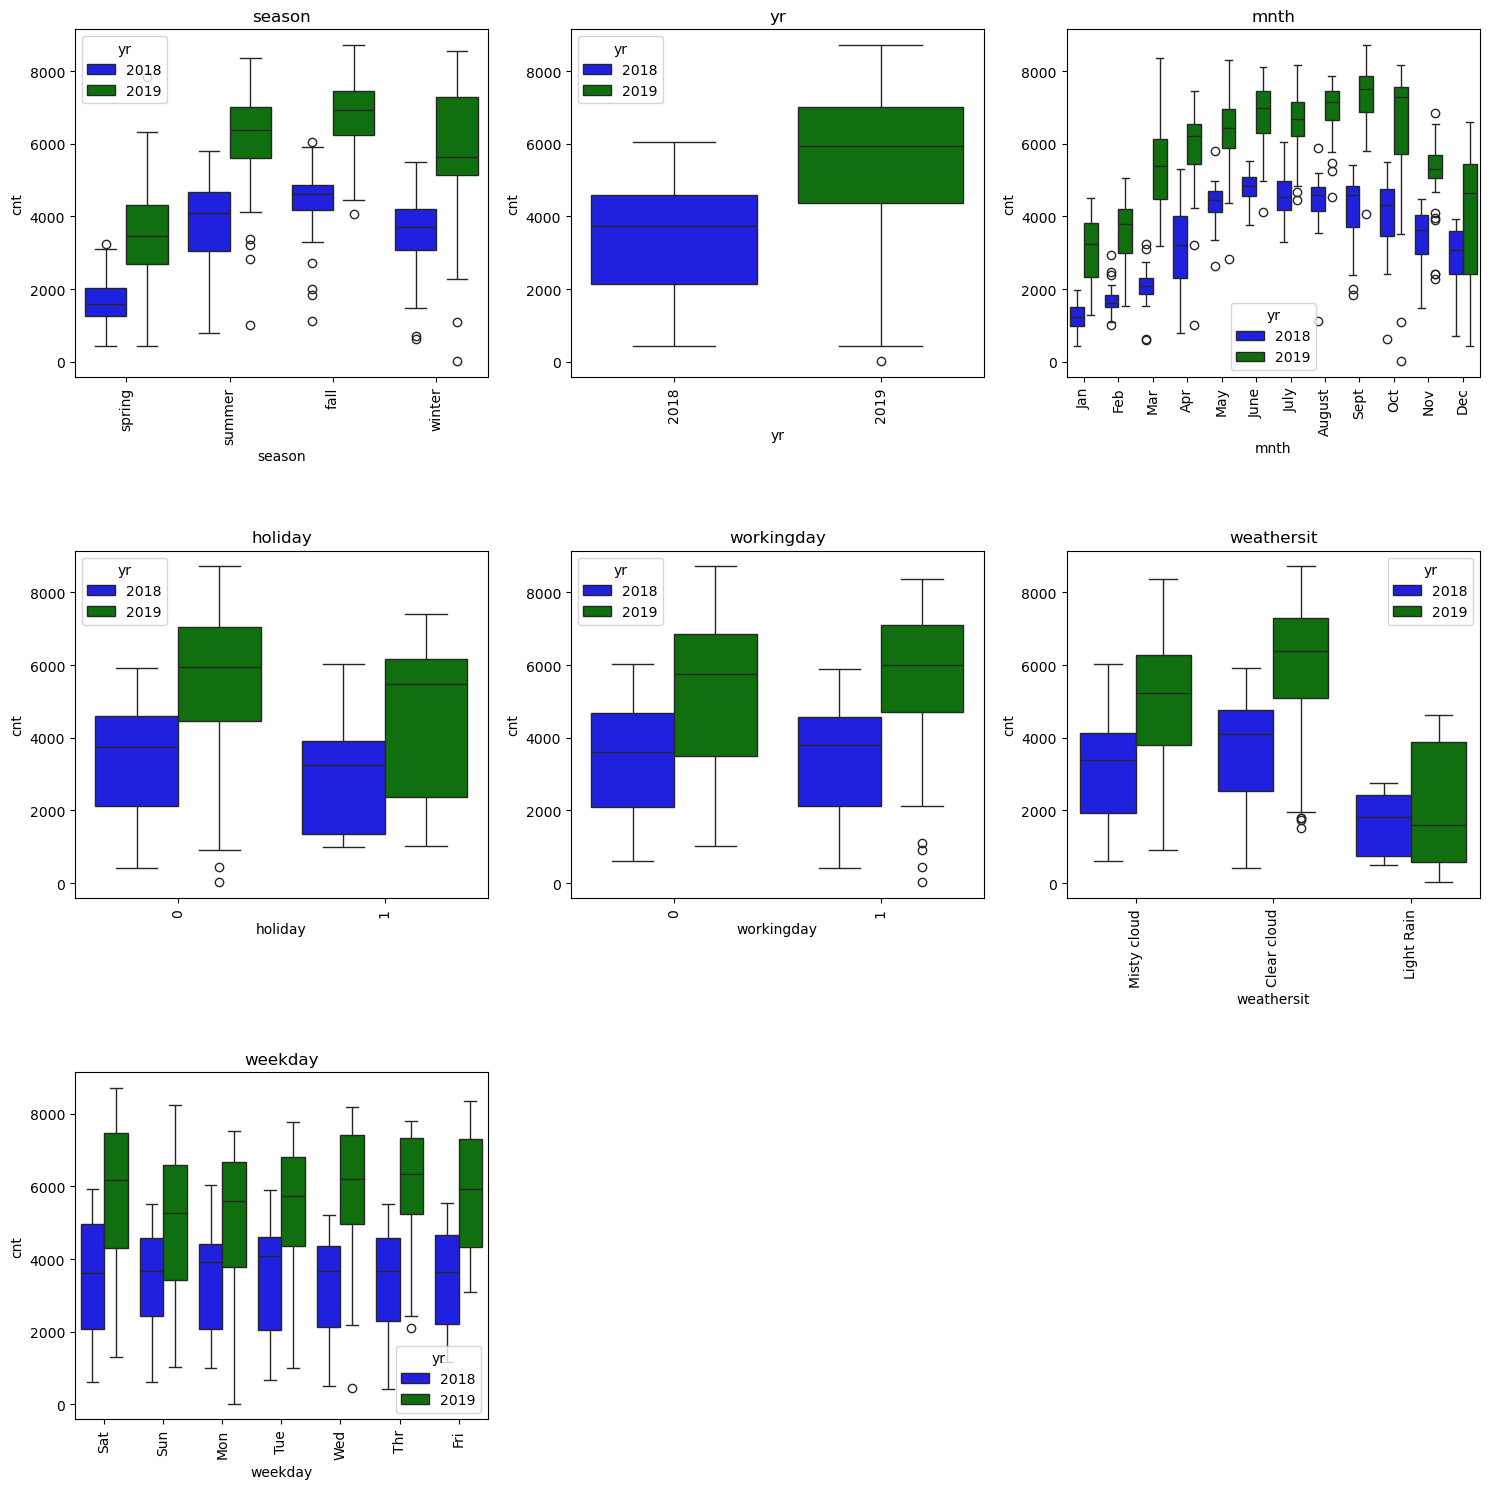

In [25]:
categoricalBoxPlot(categorical_variable,hue='yr')

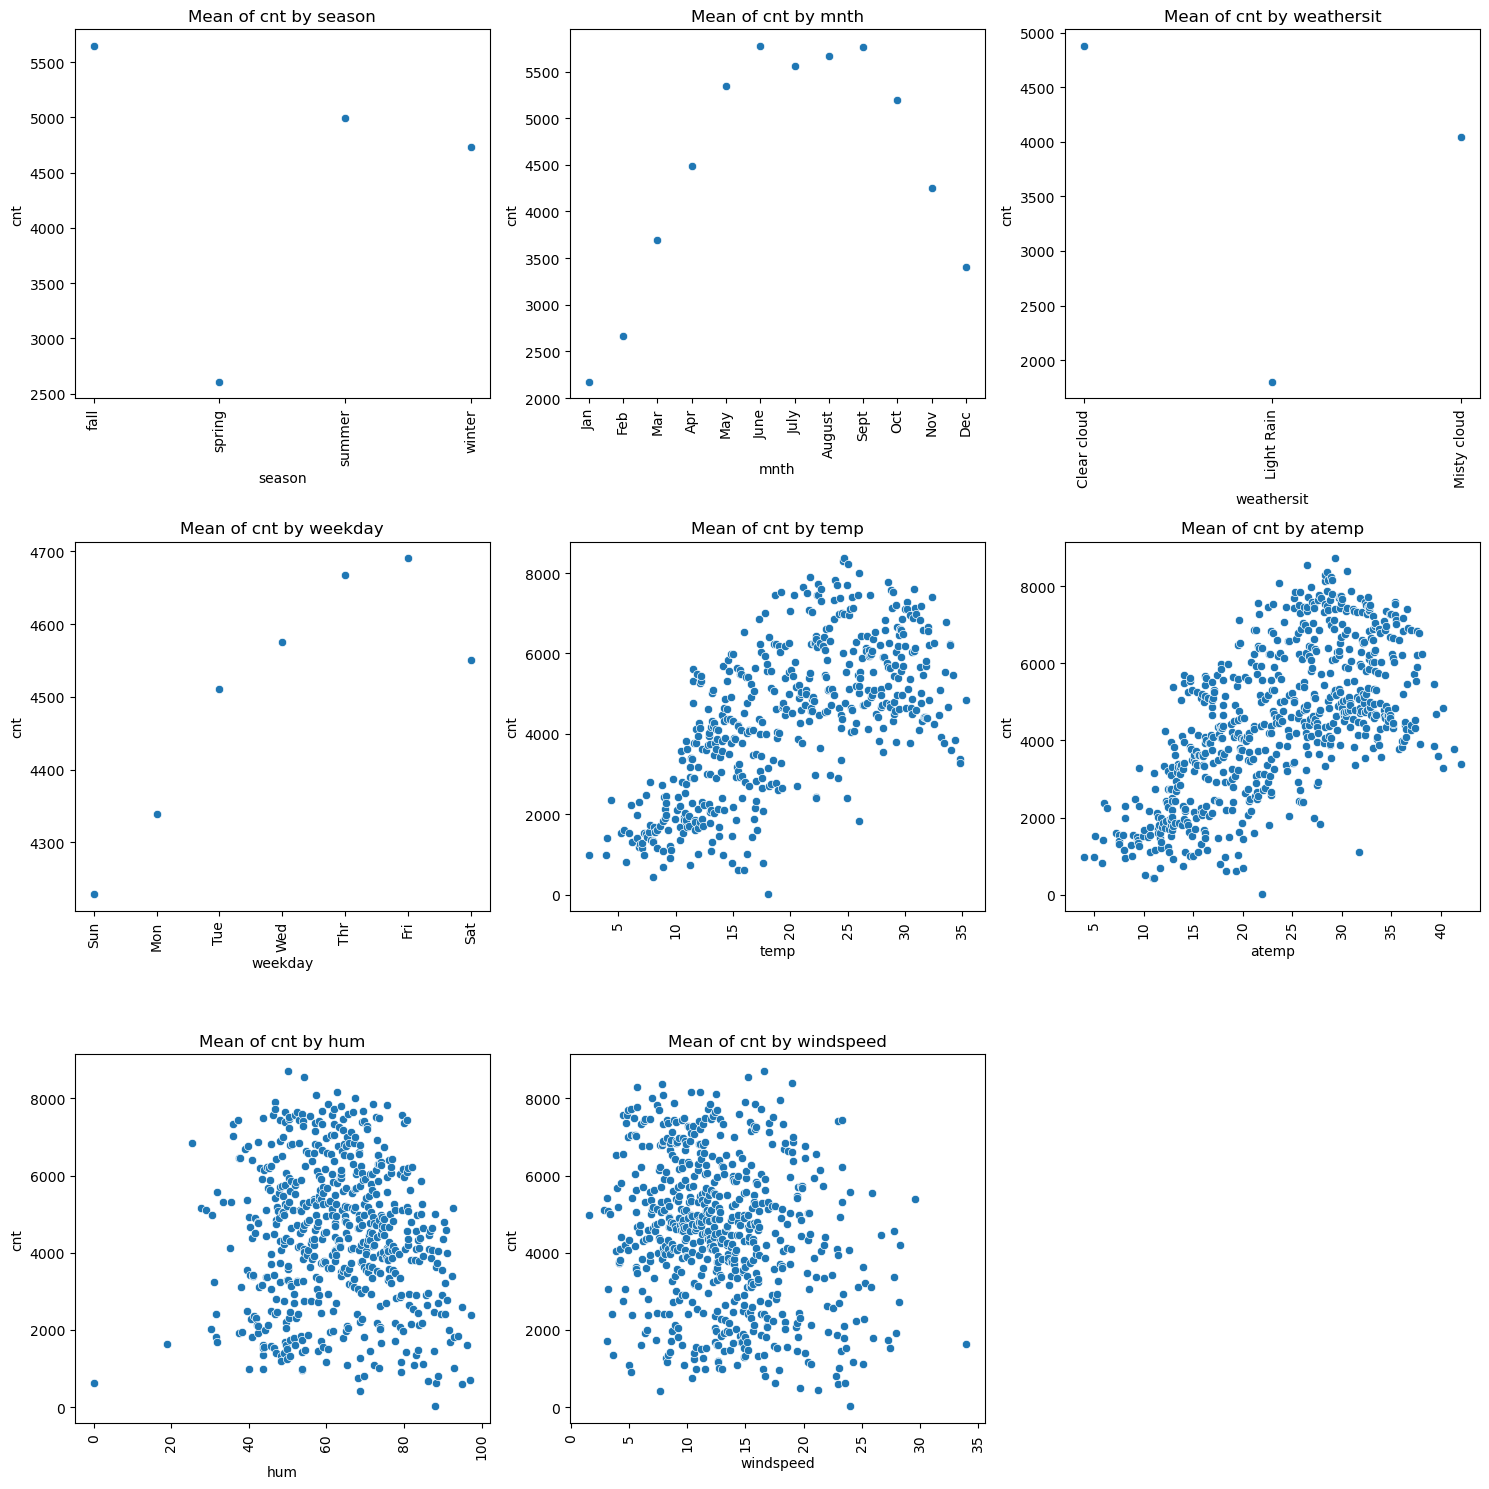

In [26]:
# avg total rental bikes visualise
aggregateScatterPlot(['season','mnth','weathersit','weekday','temp','atemp','hum','windspeed'],'mean')

**insights:**
- avg total rental bikes increases from weekday `Sunday` to `Friday`.
- there is no specific pattern of avg cnt to windspeed and humidity
- Light rain has the lowest cnt
- avg cnt increase from mnth `January` to `June` and decreases from `September` to `December`.
-  on increase in temp and atemp avg cnt increases
-  spring season has the lowest avg cnt


## 2: Data Preparation


-  dataset has many columns as categorical.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s.

In [27]:
# map 2018 to 0 and 2019 to 1
bike_sharing_new['yr'] = bike_sharing_new['yr'].map({2018:0,2019:1})
bike_sharing_new['yr'].head()

0    0
1    0
2    0
3    0
4    0
Name: yr, dtype: int64

In [28]:
# create dummy variable
status= pd.get_dummies(bike_sharing_new[['weathersit','season','mnth','weekday']],drop_first=True,dtype='i')
status.head()


,weathersit_Light Rain,weathersit_Misty cloud,season_spring,season_summer,season_winter,mnth_August,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed
0,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
bike_sharing_dummy = bike_sharing_new.drop(['weathersit','season','mnth','weekday'],axis=1)
bike_sharing_new = pd.concat([bike_sharing_dummy,status],axis=1)
bike_sharing_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'weathersit_Light Rain', 'weathersit_Misty cloud',
       'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thr',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [30]:
bike_sharing_new.nunique()

yr                          2
holiday                     2
workingday                  2
temp                      498
atemp                     689
hum                       594
windspeed                 649
cnt                       695
weathersit_Light Rain       2
weathersit_Misty cloud      2
season_spring               2
season_summer               2
season_winter               2
mnth_August                 2
mnth_Dec                    2
mnth_Feb                    2
mnth_Jan                    2
mnth_July                   2
mnth_June                   2
mnth_Mar                    2
mnth_May                    2
mnth_Nov                    2
mnth_Oct                    2
mnth_Sept                   2
weekday_Mon                 2
weekday_Sat                 2
weekday_Sun                 2
weekday_Thr                 2
weekday_Tue                 2
weekday_Wed                 2
dtype: int64

## 3: Splitting the Data into Training and Testing Sets


In [31]:
# split data into training and testing
bike_sharing_train,bike_sharing_test = train_test_split(bike_sharing_new,train_size=0.7,random_state=100)
print(bike_sharing_train.shape)
print(bike_sharing_test.shape)

(510, 30)
(220, 30)


### Rescaling the Features 
i am currenntly using min-max scaler 

In [32]:
# instance an object
scaler = MinMaxScaler()

In [33]:
def scaleFeatures(df, num_vars, is_taining_set=True, scaler=scaler):
    """
    This function scales the numerical features in the dataset using a provided scaler ( MinMaxScaler).
    It applies different methods based on whether the dataset is a training set or a test/validation set.
    
    Parameters:
    df: The dataframe containing the data to be scaled
    num_vars: List of numerical variables that need to be scaled
    is_taining_set: Boolean flag to indicate if the dataset is the training set (default is True)
    scaler: The scaling object to be used ( MinMaxScaler)

    If is_taining_set is True, the scaler is fitted and applied to the numerical features.
    Otherwise, it only applies the transformation using the already fitted scaler.
    
    Returns:
    The dataframe with scaled numerical variables.
    """

    # If the dataset is the training set, fit the scaler to the data and then transform the numerical variables
    if is_taining_set:
       df[num_vars] = scaler.fit_transform(df[num_vars])
    else:
        # If it's a test/validation set, just apply the already fitted scaler to the numerical variables
       df[num_vars] = scaler.transform(df[num_vars])
    
    return df  # Return the dataframe with the scaled numerical variables


In [34]:
# Apply scaling to all the columns except the 0,1 and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_sharing_train = scaleFeatures(bike_sharing_train,num_vars)
bike_sharing_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_Light Rain,weathersit_Misty cloud,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,1,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# bike_sharing_train[num_vars].describe()
bike_sharing_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_Light Rain,weathersit_Misty cloud,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,1,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,0


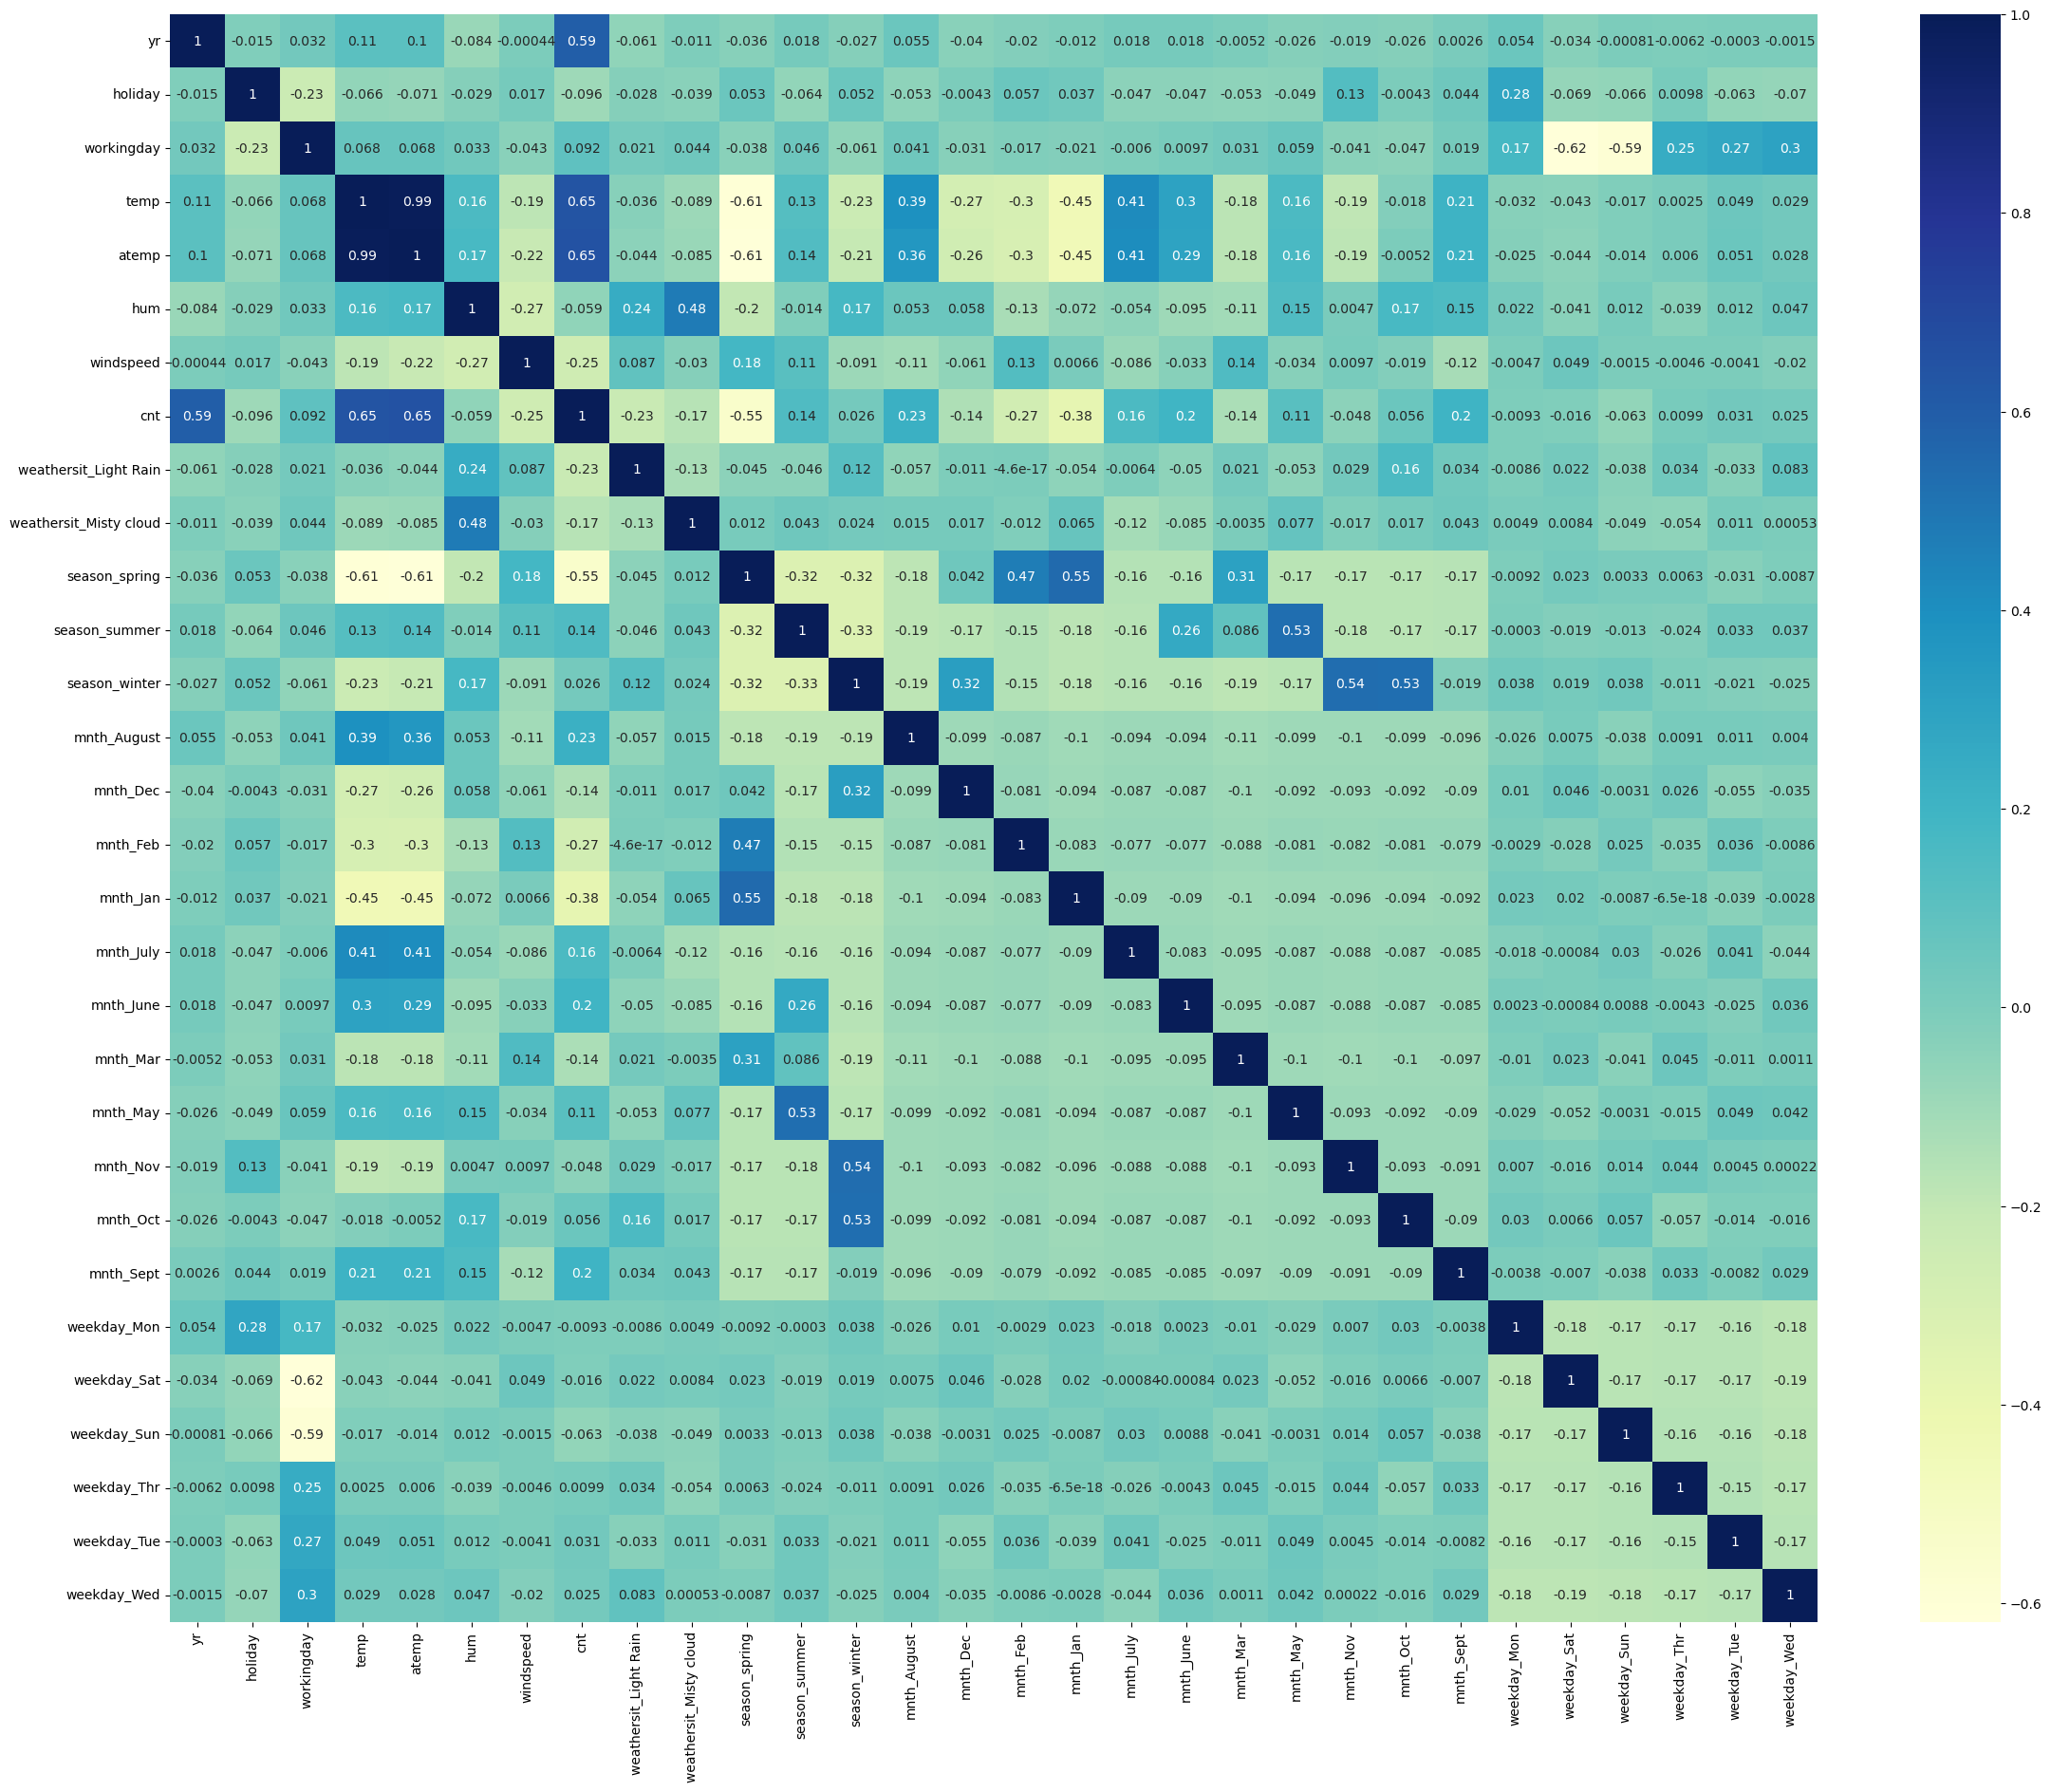

In [36]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (28, 22))
sns.heatmap(bike_sharing_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

**temp and atemp are highly corelated with each other we will use one of it and remove second later**

In [37]:
# divide variable into x and y
y_train = bike_sharing_train.pop('cnt')
X_train = bike_sharing_train

## 4: Building a linear model

In [38]:
# Building model using statsmodels for detailed statistics
def buildModel(X, y):
    """
    This function builds a linear regression model using the statsmodels library, providing detailed statistical output.

    Parameters:
    X: The feature matrix (independent variables) for the model
    y: The target variable (dependent variable) for the model
    
    The function automatically adds a constant term to the feature matrix for the intercept in the regression equation.
    
    Returns:
    A fitted linear regression model object with access to detailed statistical metrics.
    """
    
    # Adding a constant variable to the feature matrix (for the intercept term in the regression equation)
    X = sm.add_constant(X)
    
    # Creating the linear model using Ordinary Least Squares (OLS) method
    lm = sm.OLS(y, X)
    
    # Fitting the model and returning the result, which contains detailed statistics like coefficients, p-values, R-squared, etc.
    return lm.fit()


In [39]:
lm_model = LinearRegression()

In [40]:
def supportRfe(X, y, features, model=lm_model):
    """
    This function performs Recursive Feature Elimination (RFE) to select a specified number of important features 
    for a given model.
    
    Parameters:
    X: The feature matrix (independent variables)
    y: The target variable (dependent variable)
    features: The number of features to select during RFE
    model: The machine learning model to use for RFE (default is 'lm_model', a linear model)
    
    The function fits the provided model to the data and uses RFE to rank the features by their importance.
    
    Returns:
    An RFE object, which contains the feature ranking and support (selected features) information.
    """
    
    # Fit the model to the data
    model = model.fit(X, y)
    
    # Initialize RFE with the model and the specified number of features to select
    rfe = RFE(model, n_features_to_select=features)
    
    # Fit RFE to the data to rank the features
    rfe = rfe.fit(X, y)
    
    # Return the fitted RFE object, which contains the ranking and support of the features
    return rfe


In [41]:
# Calculate Variance Inflation Factor (VIF) for derived features
def caculateVif(X):
    """
    This function calculates the Variance Inflation Factor (VIF) for each feature in the feature matrix.
    VIF quantifies the extent of multicollinearity in the feature set. A higher VIF value indicates 
    higher correlation between a feature and other features, which can lead to multicollinearity issues in regression models.
    
    Parameters:
    X: The feature matrix (independent variables)
    
    Returns:
    A DataFrame containing the VIF values for each feature, sorted in descending order of VIF.
    """
    
    # Initialize an empty DataFrame to store VIF values
    vif = pd.DataFrame()
    
    # Store the feature names in the DataFrame
    vif['features'] = X.columns
    
    # Calculate the VIF for each feature and store the result in the DataFrame
    vif['VIF'] = [variance_inflation_factor(X.values, col_index) for col_index in range(X.shape[1])]
    
    # Round the VIF values to 2 decimal places for better readability
    vif['VIF'] = round(vif['VIF'], 2)
    
    # Sort the VIF values in descending order (higher VIF indicates more multicollinearity)
    vif = vif.sort_values(by="VIF", ascending=False)
    
    # Return the DataFrame containing VIF values and feature names
    return vif


### Base Model with all variables

In [42]:
# base model with all parameters
base_model = buildModel(X_train,y_train)
print(base_model.summary())
vif_base = caculateVif(X_train)
print("\n <---VIF--->")
print(vif_base)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          2.81e-180
Time:                        12:51:07   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### RFE Selection

**NOTE:** 
- Any variable p value above `0.05` will be considered insignificent.
- VIF greater than 5 will be considered as high `Multicolenear`.

In [43]:
rfe = supportRfe(X_train,y_train,15)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weathersit_Light Rain', True, 1),
 ('weathersit_Misty cloud', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', False, 8),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_July', True, 1),
 ('mnth_June', False, 14),
 ('mnth_Mar', False, 12),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 11),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thr', False, 15),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 13)]

In [44]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,weathersit_Light Rain,weathersit_Misty cloud,season_spring,season_summer,season_winter,mnth_July,mnth_Sept,weekday_Sat,weekday_Sun
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,1,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,1,0,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,1,0,0,0,0,0



#### Manual Elemnation and Build Model


In [45]:
X = X_train_rfe
y = y_train

In [46]:
# first model
lm1 = buildModel(X,y)
print(lm1.summary())
vif1 = caculateVif(X)
print("\n <---VIF--->")
print(vif1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          2.11e-191
Time:                        12:51:23   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

**holiday is insignificent**

In [47]:
X2 = X.drop('holiday',axis=1)

In [49]:
# 2nd model
lm2 = buildModel(X2,y)
print(lm2.summary())
vif2 = caculateVif(X2)
print("\n <---VIF--->")
print(vif2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          2.11e-191
Time:                        12:51:51   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

**hum has high vif**

In [50]:
X3 = X2.drop('hum',axis=1)

In [51]:
# 3rd model
lm3 = buildModel(X3,y)
print(lm3.summary())
vif3 = caculateVif(X3)
print("\n <---VIF--->")
print(vif3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          1.28e-188
Time:                        12:51:56   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

**workingday has high vif**

In [52]:
X4 = X3.drop('workingday',axis=1)

In [53]:
# 4th model
lm4 = buildModel(X4,y)
print(lm4.summary())
vif4 = caculateVif(X4)
print("\n <---VIF--->")
print(vif4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          2.06e-186
Time:                        12:52:03   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

**weekday_Sat is insignificent**

In [54]:
X5 = X4.drop('weekday_Sat',axis=1)

In [55]:
# 5th model
lm5 = buildModel(X5,y)
print(lm5.summary())
vif5 = caculateVif(X5)
print("\n <---VIF--->")
print(vif5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          3.37e-187
Time:                        12:52:14   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

**we can not drop our temp feature because it is highly corelated with target variable but we have seen in heatmap that mnth_july is highly corelated with temp and atemp with corelation cofficient 0.41 so we will drop mnth_July**

In [56]:
X6 = X5.drop('mnth_July',axis=1)

In [57]:
# 6th model
lm6 = buildModel(X6,y)
print(lm6.summary())
vif6 = caculateVif(X6)
print("\n <---VIF--->")
print(vif6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.5
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          5.70e-187
Time:                        12:52:32   Log-Likelihood:                 495.81
No. Observations:                 510   AIC:                            -969.6
Df Residuals:                     499   BIC:                            -923.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

**Now , the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only**

#### Making predictions using lm6

In [58]:
X6 = sm.add_constant(X6)
total_rental_bikes_pred_train = lm6.predict(X6)
total_rental_bikes_pred_train.head()

576    0.781186
426    0.467630
728    0.344817
482    0.574832
111    0.287698
dtype: float64

In [59]:
mse = mean_squared_error(y, total_rental_bikes_pred_train)
r_squared = r2_score(y, total_rental_bikes_pred_train)

In [60]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.008377234570944258
r_square_value : 0.8333418171181378


Text(0, 0.5, 'total renta bikes')

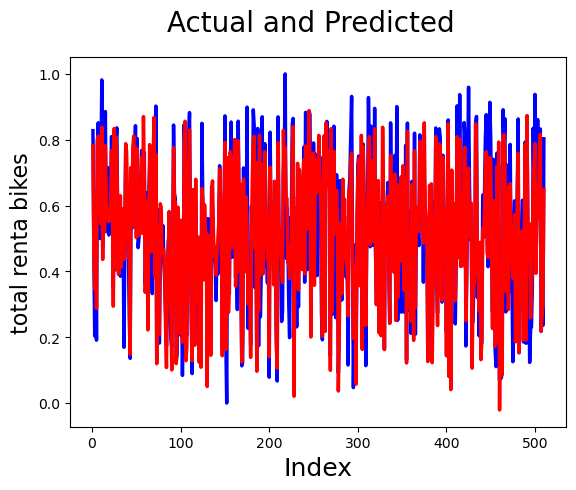

In [61]:
#Actual vs Predicted
c = [i for i in range(1,511,1)]
fig = plt.figure()
plt.plot(c,y, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,total_rental_bikes_pred_train, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=18)                         
plt.ylabel('total renta bikes', fontsize=16)      


### The Equation of best Fitted Line:

$$
\text{cnt} = 0.1956 + 0.2344 \times \text{yr} + 0.4795 \times \text{temp} + 0.0854 \times \text{mnth\_Sept} + 0.0937 \times \text{season\_winter} + 0.0623 \times \text{season\_summer} - 0.1498 \times \text{windspeed} - 0.2856 \times \text{weathersit\_Light Rain} - 0.0790 \times \text{weathersit\_Misty cloud} - 0.0572 \times \text{season\_spring} - 0.0461 \times \text{weekday\_sun}
$$



## 5: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed, let us plot the histogram of the error terms and see what it looks like.

- ### Residuals Distribution

In [62]:
residuals = y_train - total_rental_bikes_pred_train

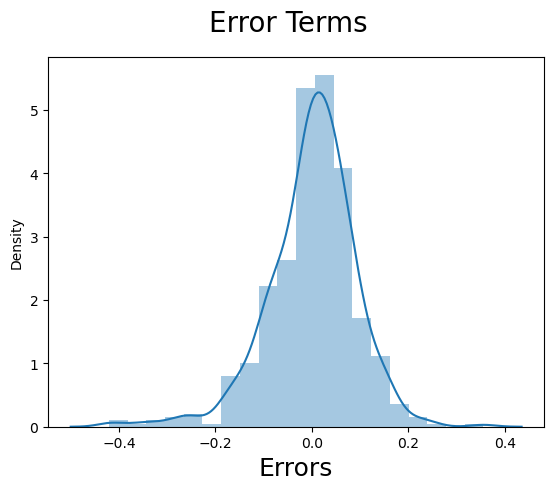

In [63]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residuals, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

**We can clearly see that error terms are normally distributed with a long tail on left hand side which suggests our model is unbiased**

- ### Residuals vs. Fitted values plot

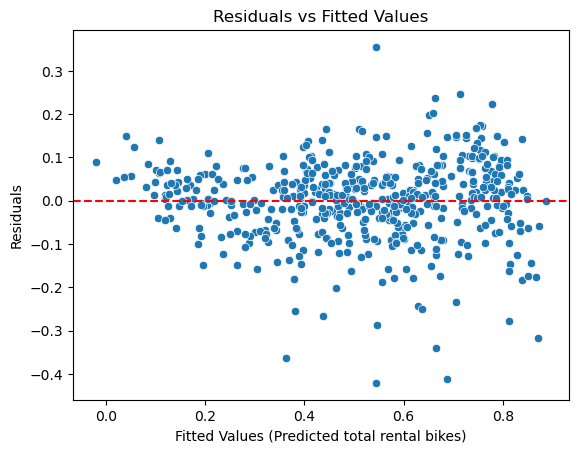

In [64]:
# Plot residuals vs. fitted values
sns.scatterplot(x=total_rental_bikes_pred_train, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values (Predicted total rental bikes)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

-  the residuals are mostly centered around zero
-  The spread of residuals seems to be relatively consistent but it can be seen that variation of residuals is increasing on increase
  in predicted total rental bikes.

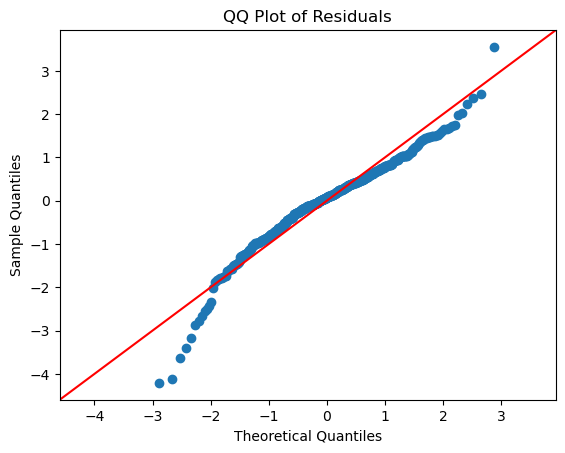

In [65]:
# Multiply scaled residuals by 10 to magnify their values for visualization purposes
sm.qqplot(residuals*10, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

## 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. tenth model.

In [66]:
features = X6.columns.to_list()  # Convert Index to a list
features.remove('const')  # Remove 'const' from the list
features

['yr',
 'temp',
 'windspeed',
 'weathersit_Light Rain',
 'weathersit_Misty cloud',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_Sept',
 'weekday_Sun']

In [67]:
bike_sharing_test = scaleFeatures(bike_sharing_test,num_vars,is_taining_set=False)
bike_sharing_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_Light Rain,weathersit_Misty cloud,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,1,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,0,0,0,0,0,1,0,0


In [68]:
y_test = bike_sharing_test.pop('cnt')
X_test = bike_sharing_test[features]
X_test.head()

,yr,temp,windspeed,weathersit_Light Rain,weathersit_Misty cloud,season_spring,season_summer,season_winter,mnth_Sept,weekday_Sun
184,0,0.831783,0.084219,0,1,0,0,0,0,0
535,1,0.901354,0.153728,0,0,0,1,0,0,0
299,0,0.511964,0.334206,0,1,0,0,1,0,0
221,0,0.881625,0.339570,0,0,0,0,0,0,0
152,0,0.817246,0.537414,0,0,0,1,0,0,0


In [69]:
X_test.shape

(220, 10)

In [70]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lm6.predict(X_test_sm)
y_test_pred

184    0.502824
535    0.901474
299    0.405740
221    0.567438
152    0.569264
         ...   
702    0.730209
127    0.481757
640    0.794418
72     0.266859
653    0.723121
Length: 220, dtype: float64

In [71]:
mse_test = mean_squared_error(y_test, y_test_pred)
r_squared_test = r2_score(y_test, y_test_pred)

In [72]:

print('Mean_Squared_Error test:' ,mse_test)
print('r_square_value test:',r_squared_test)

Mean_Squared_Error test: 0.009410289602048774
r_square_value test: 0.803190810381663




## Insights From Overall Model:
 ### Positive Influences:

 
- **yr:**  A positive coefficient of 0.2355 indicates that as the year progresses, bike demand increases. This might reflect an increasing trend in bike-sharing adoption over time.
- **temp and season_summer:** Temperature has a strong positive impact on bike demand. Warmer weather encourages more bike rentals.
- **season_winter and mnth_sep:** Specific periods like winter and September show a positive effect on bike demand.
### Negative Influences:
- **holiday and sunday:** There is lower demand on holidays and sunday, possibly due to people staying indoors or using alternative means of transport.
- **windspeed:** Higher wind speed discourages bike rentals, likely because biking becomes more difficult.
- **weathersit_Light Rain and weathersit_Misty cloud:** Poor weather conditions, particularly light rain and misty weather, significantly reduce bike demand.
- **season_spring:** spring seems to have a negative effect on bike demand compared to other seasons.
### Recommendations for Management:

Hence when the situation comes back to normal, the company should focus following points:

-  Demand tends to rise during winter, September, and warmer months. The company should consider increasing their business at those days.

-  Since light rain and misty conditions reduce bike rentals, so company should get prepare for bad weather.
-   Given the lower demand during the spring season, which is not expected.company should get root cause of this.
